# CUSTOMER SEGMENTATION MODEL

<div style="border-radius:2px; padding: 7px; background-color: #870080; font-size:10%; text-align:left">

### Name : _VAIBHAV TIWARI_
### Internship Registration Id: _STU65daede0d4c6c1708846560_


<img src="https://api-docs.treasuredata.com/static/auto-segmentation-66c4d95e638cfb8b6710408114384bf0.png" width="2400">

## Problem Statement
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

Our project aims to optimize marketing strategies and boost sales by implementing a __customer segmentation model__ using the **K-means clustering & DBSCAN algorithm**. Leveraging a transactional dataset from a UK-based retailer, our goal is to transform the data into a customer-centric format, creating features that facilitate the segmentation of customers into distinct groups. Through this segmentation, we aim to uncover unique profiles and preferences within the customer base.
    
Subsequently, we plan to develop a **recommendation system** that suggests top-selling products to customers within each segment who haven't made those specific purchases, ultimately enhancing marketing efficiency and fostering increased sales.

## Objectives:
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">



<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

+ **Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

- **Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

- **Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies. 

- **Cluster Analysis & Evaluation**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed. 

- **Recommendation System**: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## Steps
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
Step 1  | **Setup & Initialization**
   
Step 2  | **Initial Data Analysis**
    
Step 3  | **Data Cleaning & Transformation**
    
Step 4  | **Feature Engineering**
    
Step 5  | **Outlier Detection & Treatment**
    
Step 6  | **Correlation Analysis**
    
Step 7  | **Feature Scaling**
    
Step 8  | **Dimansionality Reduction**
    
Step 9  | **Model Training**
    
Step 10 | **Clustering Evaluation**
    
Step 11 | **Cluster Analysis & Profiling**
    
Step 12 | **Recommendation System**
    
Step 13 | **Conclusion**

## 1. SETUP & INITIALIZATION
<div style="border-radius:2px; padding: 4px; background-color: #870080; font-size:10%; text-align:left">

### 1.1. Importing Libraries
<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
We will import the libraries necessary to carry out the works in this project at various stages.

In [1]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
!pip install plotly
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
!pip install tabulate
from tabulate import tabulate
from collections import Counter
%matplotlib inline

In [2]:
# Configure Seaborn plot styles: Set background color and use dark grid 
sns.set(rc={'axes.facecolor' : '#afeeee'}, style='darkgrid')

### 1.2. Loading Dataset
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

In [3]:
# Loading the dataset

df = pd.read_csv('customer_data_internship.csv')

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:130%; text-align:left">

<h2 align="left"><font color=#870080>Dataset Description:</font></h2>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |

## 2. INITIAL DATA ANALYSIS
<div style="border-radius:2px; padding: 4px; background-color: #870080; font-size:10%; text-align:left">

### 2.1. Dataset Overview
<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
A preliminary analysis to understand the structure and data types.

In [4]:
print(df.shape)

(541909, 8)


In [5]:
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

In [6]:
df.sample(20)

InvoiceNo StockCode                          Description  Quantity  \
224263    556512     21770               OPEN CLOSED METAL SIGN         5   
329896    565857     48111                DOORMAT 3 SMILEY CATS         2   
337090    566427     23144      ZINC T-LIGHT HOLDER STARS SMALL         6   
441599    574589     22603        CHRISTMAS RETROSPOT TREE WOOD        10   
240367    558099     22621           TRADITIONAL KNITTING NANCY         7   
520759    580298     22753      SMALL YELLOW BABUSHKA NOTEBOOK         24   
114578    546028     82486    WOOD S/3 CABINET ANT WHITE FINISH         2   
155402    549985     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
141805    548522     21928  JUMBO BAG SCANDINAVIAN BLUE PAISLEY         1   
240806    558116     22055   MINI CAKE STAND  HANGING STRAWBERY         1   
40214     539731     22352    LUNCH BOX WITH CUTLERY RETROSPOT         60   
419611    572846     23309  SET OF 60 I LOVE LONDON CAKE CASES          6   
64320     541600     22866                                  NaN       -64   
166221    550906     22066               LOVE HEART TRINKET POT        48   
83630     543345     22064           PINK DOUGHNUT TRINKET POT          4   
76951     542664     35924        HANGING FAIRY CAKE DECORATION         1   
432865    573897     22818               CARD CHRISTMAS VILLAGE        12   
379918    569717     23102       SILVER HEARTS TABLE DECORATION        32   
269434    560451     22460       EMBOSSED GLASS TEALIGHT HOLDER        12   
435403    574074     84946         ANTIQUE SILVER T-LIGHT GLASS         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
224263   6/13/2011 10:44       4.95     14688.0  United Kingdom  
329896    9/7/2011 14:13       8.25     14911.0            EIRE  
337090   9/12/2011 14:24       0.83     17433.0  United Kingdom  
441599   11/6/2011 10:33       0.85     15017.0  United Kingdom  
240367   6/26/2011 13:45       1.65     17593.0  United Kingdom  
520759   12/2/2011 13:54       0.21     17086.0  United Kingdom  
114578     3/9/2011 8:33       8.95     17049.0  United Kingdom  
155402   4/13/2011 15:58       4.15     15640.0  United Kingdom  
141805   3/31/2011 16:43       4.13         NaN  United Kingdom  
240806    6/27/2011 9:11       3.29         NaN  United Kingdom  
40214   12/21/2010 15:05       2.10     14646.0     Netherlands  
419611  10/26/2011 12:14       0.55     14550.0  United Kingdom  
64320    1/19/2011 16:48       0.00         NaN  United Kingdom  
166221   4/21/2011 12:34       0.39     14298.0  United Kingdom  
83630     2/7/2011 12:29       3.29         NaN  United Kingdom  
76951    1/31/2011 12:14       4.13         NaN  United Kingdom  
432865   11/1/2011 14:29       0.42     16729.0  United Kingdom  
379918    10/6/2011 8:25       0.83     13845.0  United Kingdom  
269434    7/19/2011 9:50       1.25     14911.0            EIRE  
435403   11/2/2011 15:33       2.46         NaN  United Kingdom

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
In first glance, we can see there are some missing/nan values.
Let's get some more details.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<AxesSubplot:>

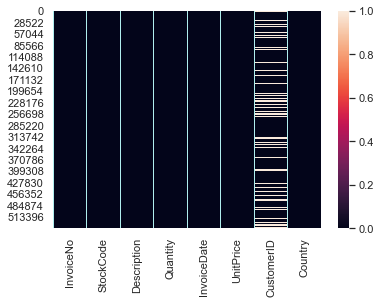

In [8]:
#Visualizing Missing Values
# Checking Null Values by Plotting Heatmap

sns.heatmap(df.isnull(),cbar=True)

### Inferences
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


The dataset consists of 541,909 entries and 8 columns. Here is a brief overview of each column:

- **`InvoiceNo`**: This is an object data type column that contains the invoice number for each transaction. Each invoice number can represent multiple items purchased in a single transaction.
- **`StockCode`**: An object data type column representing the product code for each item.
- **`Description`**: This column, also an object data type, contains descriptions of the products. It has some missing values,with 540,455 non-null entries out of 541,909.
- **`Quantity`**: This is an integer column indicating the quantity of products purchased in each transaction.
- **`InvoiceDate`**: A datetime column that records the date and time of each transaction.
- **`UnitPrice`**: A float column representing the unit price of each product.
- **`CustomerID`**: A float column that contains the customer ID for each transaction. This column has a significant number of missing values, with only 406,829 non-null entries out of 541,909.
- **`Country`**: An object column recording the country where each transaction took place.

From a preliminary overview, it seems that there are **missing values in the `Description` and `CustomerID` columns** which need to be addressed. The InvoiceDate column is already in datetime format, which will facilitate further time series analysis. We also observe that a single customer can have multiple transactions as inferred from the repeated CustomerID in the initial 
rows.

### 2.2. Summary Statistics
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

In [9]:
# Statistical Summary for numerical columns

df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [10]:
# Statistical Summary for Categorical columns

df.describe (include = 'object')

InvoiceNo StockCode                         Description  \
count     541909    541909                              540455   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   

             InvoiceDate         Country  
count             541909          541909  
unique             23260              38  
top     10/31/2011 14:41  United Kingdom  
freq                1114          495478

### Inferences
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


- `Quantity`:

   - The average quantity of products in a transaction is approximately 9.55.
   - The quantity has a wide range, with a minimum value of -80995 and a          maximum value of 80995. The *negative values indicate returned or              cancelled orders*, which need to be handled appropriately.
   - The standard deviation is quite large, indicating a significant spread        in the data. The presence of *outliers* is indicated by a large difference      between the maximum and the 75th percentile values.

- **`UnitPrice`**:

   - The average unit price of the products is approximately 4.61.
   - The unit price also shows a wide range, from -11062.06 to 38970, which        suggests the *presence of errors or noise* in the data, as negative prices      don't make sense.
   - Similar to the Quantity column, the *presence of outliers is indicated* by      a large difference between the maximum and the 75th percentile values.

- **`CustomerID`**:

   - There are 406829 non-null entries, indicating *missing values* in the          dataset which need to be addressed.
   - The Customer IDs range from 12346 to 18287, helping in identifying unique customers.
   
- **`InvoiceNo`**:

  - There are 25900 unique invoice numbers, indicating 25900 separate transactions. The most frequent invoice number is 573585, appearing 1114 times, possibly representing a large transaction or an order with multiple items.

- **`StockCode`**:

  - There are 4070 unique stock codes representing different products.
  - The most frequent stock code is 85123A, appearing 2313 times in the dataset.

- **`Description`**:

  - There are 4223 unique product descriptions.
  - The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER", appearing 2369 times.

- **`Country`**:

  - The transactions come from 38 different countries, with a dominant majority of the transactions (approximately 91.4%) originating from the United Kingdom.

## 3. DATA CLEANING AND TRANSFORMATION
<div style="border-radius:2px; padding: 4px; background-color: #870080; font-size:10%; text-align:left">

### 3.1. Handling Missing Values
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


In our preliminary analysis, we found that our data has some missing values which needs to be properly handled for good results.

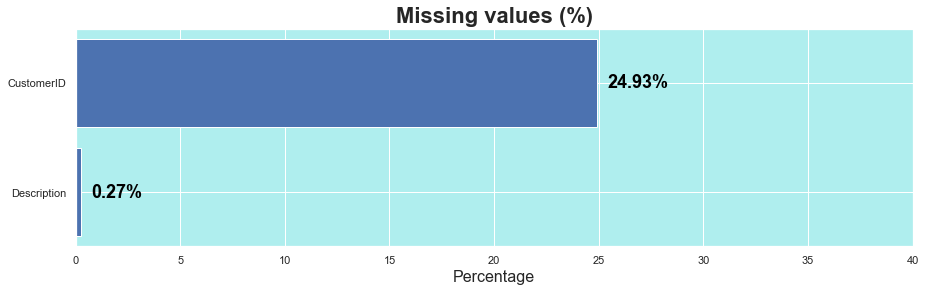

In [11]:
#Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data> 0]/df.shape[0])*100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

#Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage)

#Annotate the values and indexes

for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight="bold", fontsize=18, color="black")

#Set x-axis Limit 
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title('Missing values (%)',fontweight='bold', fontsize=22)
plt.xlabel('Percentage',fontsize = 16)
plt.show()

### Strategy to handle missing values
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


- **CustomerID (24.93% missing values)**

  - The Customer ID column contains nearly a quarter of missing data. This column is essential for clustering customers and creating a recommendation system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.
  - Moreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing Customer IDs seems to be the most reasonable approach to maintain the integrity of the clusters and the analysis.

- **Description (0.27% missing values)**

  - The Description column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same Stock Code does not always have the same Description. This Indicates data quality issues and potential errors in the product descriptions.

  - Given these inconsistencies, imputing the missing descriptions based on StockCode might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing Description to avoid propagating errors and inconsistencies into the subsequent analyses.

By removing rows with missing values in the Customer ID and Description columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.

In [12]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns 
df[df["CustomerID"].isnull() | df['Description'].isnull()].head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom

In [13]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns 
df=df.dropna(subset=['CustomerID', 'Description'])

In [14]:
# Verifying the removal of missing values 
df.isnull().sum().sum()

0

### 3.2. Handling Duplicates
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


Duplicate values can potentially cause overfitting and reduce performance, therefore it is important to make sure they are not present in our dataset.

In [15]:
# Finding out the number of Duplicates
print('The number of duplicate rows in dataset is ' + str(len(df[df.duplicated()]))+'.')

The number of duplicate rows in dataset is 5225.


In [16]:
# Finding Duplicate rows
duplicate_rows = df [df.duplicated(keep=False)]

#Sorting the data by certain columns to see the duplicate rows next to each other 
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID','Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head (10)

InvoiceNo StockCode                       Description  Quantity  \
494    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
485    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
539    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
527    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
521    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
537    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
578    536412     21448         12 DAISY PEGS IN WOOD BOX         1   
598    536412     21448         12 DAISY PEGS IN WOOD BOX         1   

         InvoiceDate  UnitPrice  CustomerID         Country  
494  12/1/2010 11:45       1.25     17908.0  United Kingdom  
517  12/1/2010 11:45       1.25     17908.0  United Kingdom  
485  12/1/2010 11:45       4.95     17908.0  United Kingdom  
539  12/1/2010 11:45       4.95     17908.0  United Kingdom  
489  12/1/2010 11:45       2.10     17908.0  United Kingdom  
527  12/1/2010 11:45       2.10     17908.0  United Kingdom  
521  12/1/2010 11:45       2.95     17908.0  United Kingdom  
537  12/1/2010 11:45       2.95     17908.0  United Kingdom  
578  12/1/2010 11:49       1.65     17920.0  United Kingdom  
598  12/1/2010 11:49       1.65     17920.0  United Kingdom

### Strategy for Handling Duplicates Values
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


We will remove identical duplicate rows from the dataset. Removing these rows will help in achieving a cleaner dataset, which in turn would aid in building more accurate customer clusters based on their unique purchasing behaviors. Moreover, it would help in creating a more precise recommendation system by correctly identifying the products with the most purchases.

In [17]:
#Removing duplicate rows

df.drop_duplicates (inplace=True)

In [18]:
df.shape

(401604, 8)

### 3.3. Treatment of Cancelled Transactions

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


We need to identify cancelled transactions in order to better understand customer preferences and behaviours.

We will use 'C' prefixes in the `InvoiceNo` to identify such transactions.

In [19]:
#Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status 
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')


#Analyze the characteristics of these rows (considering the new column) 
cancelled_transactions=df[df['Transaction_Status'] == 'Cancelled'] 
cancelled_transactions.describe().drop('CustomerID', axis=1)

Quantity     UnitPrice
count   8872.000000   8872.000000
mean     -30.774910     18.899512
std     1172.249902    445.190864
min   -80995.000000      0.010000
25%       -6.000000      1.450000
50%       -2.000000      2.950000
75%       -1.000000      4.950000
max       -1.000000  38970.000000

### Strategy for Handling Cancelled Transaction
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


Our strategy is to **retain these transactions** for further analysis for market and customer behaviour.

It will also help us to design a better recommendation system that avoids suggesting products with high cancellation rates.

In [20]:
# Finding the percentage of cancelled transactions 
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0])*100

#Printing the percentage of cancelled transactions 
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


### 3.4. Correcting StockCode Anomalies


<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

In [21]:
# Finding the number of unique stock codes 
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes 
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


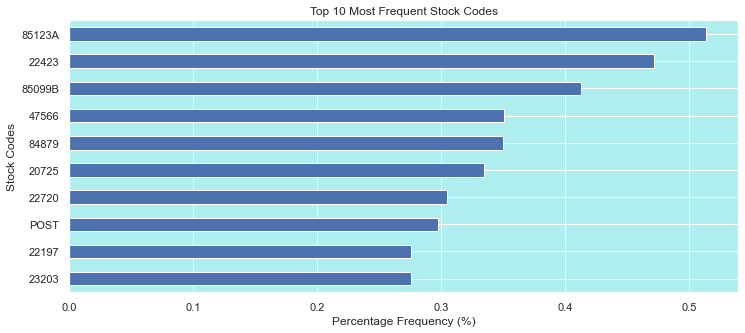

In [22]:
# Top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10)*100

# Plotting the top 10 most frequent stock codes 
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh')

# Adding the percentage frequency on the bars for index, value in enumerate(top_10_stock_codes): I plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

### Inferences Drawn on Stock Code
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


- The dataset has *3684 unique values*. This distinction can be important to identify distinct customer clusters.

- While most stock codes have 5 or 6 characters, there are some anomalies like the code 'POST'. These anomalies must be investigated and treated as such.

In [23]:
#Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
dtype: int64


### Inferences
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


3676 entries have 5 numeric characters, however there are __7 entries with 0 numeric characters which is an anomaly__. It should be identified and treated properly.

In [24]:
# Finding and printing the stock codes with and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new Line
print("Anomalous stock codes:")
print("-"*22)

for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [25]:
# Calculating the percentage of records with these stock codes 
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum()/len (df))*100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")


The percentage of records with anomalous stock codes in the dataset is: 0.48%


### Inferences

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


These anomolous codes are present in **0.48%** records of the dataset, but can cause distortions and affect the model. So we should try to remove these.

In [26]:
# Removing rows with anomalous stock codes from the dataset 
df=df[~df['StockCode'].isin(anomalous_stock_codes)] 


# Getting the number of rows in the dataframe 
df.shape[0]

399689

### 3.5. Cleaning `Description` Column
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

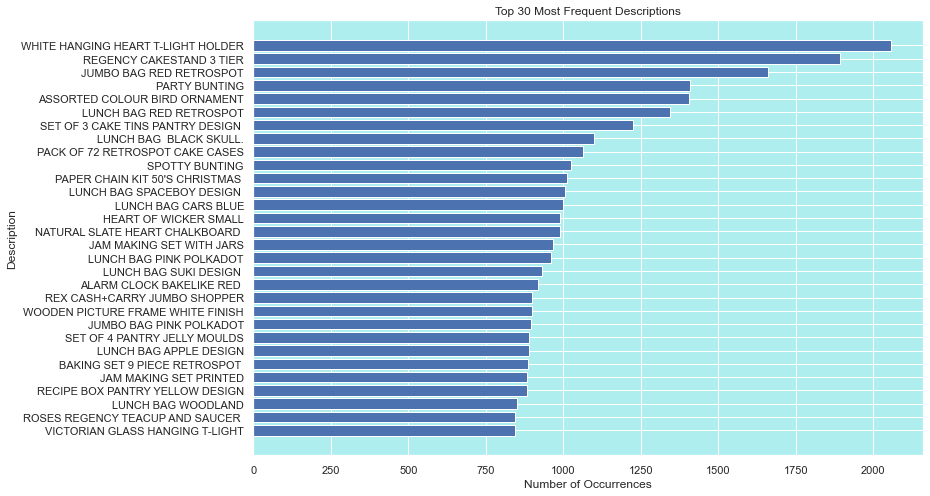

In [27]:
# Calculate the occurrence of each unique description and sort them 
description_counts = df['Description'].value_counts()

#Get the top 30 descriptions
top_30_descriptions=description_counts[:30]

#Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1])

# Adding Labels and title

plt.xlabel("Number of Occurrences")
plt.ylabel("Description")
plt.title("Top 30 Most Frequent Descriptions")
plt.show()

### Inferences on above analysis on 'Description'

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


- Most frequent items are of general household usage.

- Uppercase is used in description of most items and seems to be the standard practice. Hence we should investigate the lowercase entries.

In [28]:
# Find unique descriptions containing Lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing Lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


### Inferences

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">


There seem to be two decriptions 'Next Day Carriage' and 'High Resolution Image' that are not describing products. So these must be treated as anomalies. 



### Strategy

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
We will remove the rows with the two mentioned entries.

In [29]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0]/df.shape[0]*100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df=df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset 
df['Description'] = df['Description'].str.upper()

df.shape[0]

The percentage of records with service-related descriptions in the dataset is: 0.02%


399606

### Treating Zero Unit Prices

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

In [30]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
The seems to be item(s) with price marked **0.0**. It can be some error or free item.

This requires investigation.

In [31]:
df[df['UnitPrice']==0].describe()['Quantity']

count       33.000000
mean       420.515152
std       2176.713608
min          1.000000
25%          2.000000
50%         11.000000
75%         36.000000
max      12540.000000
Name: Quantity, dtype: float64

### Inferences

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

There are **33 counts of item with 'zero' price** which can act as noise and impact the accuracy, so it should be removed.

In [32]:
df = df[df['UnitPrice']>0]

## 4. FEATURE ENGINEERING

<div style="border-radius:2px; padding: 4px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

Feature engineering is the process of selecting, transforming, and creating input variables to improve the performance of machine learning models by providing more informative and discriminative features.

 ### 4.1. RFM Features
 
 <div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87CEEB; font-size:120%; text-align:left">
RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

- **Recency (R)**: This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand. 

- **Frequency (F)**: This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

- **Monetary (M)**: This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.


Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.

### 4.1.1. Recency

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

### Strategy

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">


<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
In this step, we focus on understanding how recently a customer has made a purchase. This is a crucial aspect of customer segmentation as it helps in identifying the engagement level of customers. Here, I am going to define the following feature:

- __Days Since Last Purchase__: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the business, whereas a higher value may indicate a lapse or decreased engagement. By understanding the recency of purchases, businesses can tailor their marketing strategies to re-engage customers who have not made purchases in a while, potentially increasing customer retention and fostering loyalty.

In [33]:
# Convert InvoiceDate to datetime type
#extract date
print(df['InvoiceDate'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace = True)

print(customer_data)

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 399573, dtype: object
      CustomerID  Days_Since_Last_Purchase
0        12346.0                       325
1        12347.0                         2
2        12348.0                        75
3        12349.0                        18
4        12350.0                       310
...          ...                       ...
4357     18280.0                       277
4358     18281.0                       180
4359     18282.0                         7
4360     18283.0                         3
4361     18287.0                        42

[4362 rows x 2 columns]


In [34]:
customer_data.head()

CustomerID  Days_Since_Last_Purchase
0     12346.0                       325
1     12347.0                         2
2     12348.0                        75
3     12349.0                        18
4     12350.0                       310

### 4.1.2. Frequency

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

### Strategy

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
In this step, we will create two features that quantify the frequency of a customer's engagement with the retailer:

- **Total Transactions**: This feature represents the total number of transactions made by a customer. It helps in understanding the engagement level of a customer with the retailer.
- **Total Products Purchased**: This feature indicates the total number of products (sum of quantities) purchased by a customer across all transactions. It gives an insight into the customer's buying behavior in terms of the volume of products purchased.
    
These features will be crucial in segmenting customers based on their buying frequency, which is a key aspect in determining customer segments for targeted marketing and personalized recommendations.

In [35]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

#Merge the new features into the customer dota dotoframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID') 
customer_data = pd.merge(customer_data, total_products_purchased, on= 'CustomerID')

#Display the first few rows of the customer data dataframe 
customer_data.sample(10)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
3968     17739.0                        11                   8   
3250     16755.0                       114                   5   
2780     16119.0                         8                   2   
3979     17759.0                        17                   3   
1424     14271.0                       225                   1   
3838     17572.0                        71                   4   
3321     16843.0                        42                  17   
3245     16750.0                        44                   5   
3498     17091.0                         2                  10   
1263     14050.0                        31                   2   

      Total_Products_Purchased  
3968                       856  
3250                      1052  
2780                       240  
3979                       696  
1424                        88  
3838                        95  
3321                     10154  
3245                       214  
3498                      1743  
1263                       689

### 4.1.3. Monetary

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
In this step, we will create two features that represent the monetary aspect of customer's transactions:

- __Total Spend__: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the product of `UnitPrice` and `Quantity` for all transactions made by a customer. This feature is crucial as it helps in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.

    
- __Average Transaction Value__: This feature is calculated as the __Total Spend__ divided by the __Total Transactions__ for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customers per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.    

In [36]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.sample(5)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
4324     18233.0                       325                   1   
2861     16218.0                        29                   8   
1501     14385.0                         9                   3   
3538     17154.0                        75                   1   
980      13662.0                        85                   7   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  
4324                         4       440.00                 440.000000  
2861                      2077      3054.87                 381.858750  
1501                       159       202.11                  67.370000  
3538                       490       329.34                 329.340000  
980                        528       862.58                 123.225714

### 4.2. Product Diversity


<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
In this step, we are going to understand the diversity in the product purchase behavior of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations. Here, I am going to define the following feature:

- __Unique Products Purchased__: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which can be a critical input in personalizing product recommendations.

In [37]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID') ['StockCode'].nunique().reset_index() 
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe 
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe

customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  
0                          1  
1                        103  
2                         21  
3                         72  
4                         16

### 4.3. Behavioural Features

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

- __Average Days Between Purchases__: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.

    
- __Favourite Shopping Day__: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.

    
- __Favourite Shopping Hour__: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.

    
By including these behavioral features in our dataset, we can create a more rounded view of our customers, which will potentially enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.

In [38]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on = 'CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on = 'CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on = 'CustomerID')



In [39]:
# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  
0    10  
1    14  
2    19  
3     9  
4    16

### 4.4. Geographic Features

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
In this step, we will introduce a geographic feature that reflects the geographical location of customers. Understanding the geographic distribution of customers is pivotal for several reasons:

- **Country**: This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning. Furthermore, it can be instrumental in logistics and supply chain optimization, particularly for an online retailer where shipping and delivery play a significant role.

In [40]:
print(df['Country'].value_counts().head())
print(df['Country'].value_counts(normalize=True).head())


United Kingdom    356008
Germany             9079
France              8152
EIRE                7368
Spain               2462
Name: Country, dtype: int64
United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: Country, dtype: float64


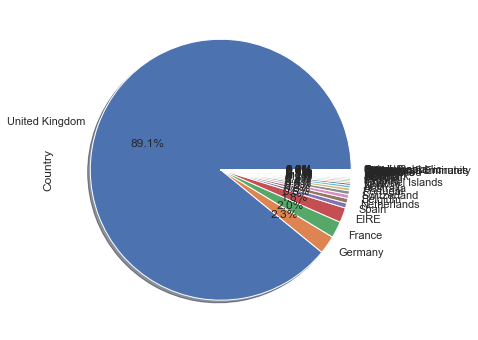

In [41]:
df['Country'].value_counts().plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',shadow=True)
plt.show()

### Inferences
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

- **89%** of the total transactions are from **United Knigdom** only.
- We can create a **binary feature** that indicates whether the transaction is from UK or not in order to streamline the clustering process.

### Strategy
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
- First, we will group the data by `CustomerID` and `Country` and calculate the number of transactions per country for each customer.

- Next, we will identify the main country for each customer (the country from which they have the maximum transactions).
    
- Then, we will create a binary column indicating whether the customer is from the UK or not.
    
- Finally, we will merge this information with the `customer_data` dataframe to include the new feature in our analysis.

In [42]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.sample(5)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
3433     17082.0                        33                   2   
1407     14277.0                        15                   4   
3283     16871.0                        22                   7   
3467     17134.0                       106                   2   
2912     16360.0                         4                   8   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
3433                      1049      2003.85                1001.925000   
1407                      1614      3892.80                 973.200000   
3283                      1250      2761.49                 394.498571   
3467                        98       413.20                 206.600000   
2912                      2094      3349.57                 418.696250   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
3433                         75                        3.562500            6   
1407                        194                        0.883408            3   
3283                        131                        1.797101            4   
3467                         21                        7.181818            6   
2912                        365                        0.130435            1   

      Hour  Is_UK  
3433    15      1  
1407    15      0  
3283    11      1  
3467    11      1  
2912    12      1

In [43]:
plt.figure(figsize=(10,6))
plt.bar(uk_counts.index, uk_counts.values)
plt.xlabel('is_uk')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not UK', 'UK'])

# Show plot
plt.show()

# Display feature distribution
customer_data['Is_UK'].value_counts()

NameError: name 'uk_counts' is not defined

<Figure size 720x432 with 0 Axes>

### 4.5. Cancellation Insights
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
In this step, we are going to delve deeper into the cancellation patterns of customers to gain insights that can enhance our customer segmentation model. The features being introduced are:

- __Cancellation Frequency__: This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.

    
- __Cancellation Rate__: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.

By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.

In [45]:
# Calculating the total number of transactions made by each customer 
total_transactions= df.groupby('CustomerID') ['InvoiceNo'].nunique().reset_index()

# Calculating the number of cancelled transactions for each customer

cancelled_transactions = df [df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index() 
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merging the Cancellation Frequency data into the customer_data dataframe 
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)


#Calculate the Cancellation Rate 
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Displaying the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  
0    10      1                     1.0                0.5  
1    14      0                     0.0                0.0  
2    19      0                     0.0                0.0  
3     9      0                     0.0                0.0  
4    16      0                     0.0                0.0

### Seasonality & Trends

<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
In this step, we will delve into the seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. Here are the features I am looking to introduce:

- __Monthly_Spending_Mean__: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.

    
- __Monthly_Spending_Std__: This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.

    
- __Spending_Trend__: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.

By incorporating these detailed insights into our customer segmentation model, we can create more precise and actionable customer groups, facilitating the development of highly targeted marketing strategies and promotions.


In [46]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0
    
# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

#The calculated slope represents the rate of change in spending over time. 
#Positive slopes indicate increasing spending trends, while negative slopes suggest decreasing trends.

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    10      1                     1.0                0.5   
1    14      0                     0.0                0.0   
2    19      0                     0.0                0.0   
3     9      0                     0.0                0.0   
4    16      0                     0.0                0.0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0               0.000000              0.000000        0.000000  
1             615.714286            341.070789        4.486071  
2             359.310000            203.875689     -100.884000  
3            1457.550000              0.000000        0.000000  
4             294.400000              0.000000        0.000000

In [47]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   float64
 1   Days_Since_Last_Purchase        4282 non-null   int64  
 2   Total_Transactions              4282 non-null   int64  
 3   Total_Products_Purchased        4282 non-null   int64  
 4   Total_Spend                     4282 non-null   float64
 5   Average_Transaction_Value       4282 non-null   float64
 6   Unique_Products_Purchased       4282 non-null   int64  
 7   Average_Days_Between_Purchases  4282 non-null   float64
 8   Day_Of_Week                     4282 non-null   int64  
 9   Hour                            4282 non-null   int64  
 10  Is_UK                           4282 non-null   int64  
 11  Cancellation_Frequency          4282 non-null   float64
 12  Cancellation_Rate               42

In [48]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)


In [49]:
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    10      1                     1.0                0.5   
1    14      0                     0.0                0.0   
2    19      0                     0.0                0.0   
3     9      0                     0.0                0.0   
4    16      0                     0.0                0.0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0               0.000000              0.000000        0.000000  
1             615.714286            341.070789        4.486071  
2             359.310000            203.875689     -100.884000  
3            1457.550000              0.000000        0.000000  
4             294.400000              0.000000        0.000000

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

Let's review the descriptions of the columns in our newly created `customer_data` dataset:

### CUSTOMER DATASET DESCRIPTION
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
| __Variable__                       | __Description__ |
|     :---                           |       :---      |
| __CustomerID__                     | Unique Identifier for every customer.|
| __Days_Since_Last_Purchase__       | Number of dats since last purchase for a customer|
| __Total_Transactions__             | Total number of transactions made by a customer.|
| __Total_Products_Purchased__       | Total quantity of products purchased by a customer across all transactions.
| __Total_Spend__                    | The total amount of money the customer has spent across all transactions. |
| __Average_Transaction_Value__      | The average value of the customer's transactions, calculated as total spend divided by the number of transactions. |
| __Unique_Products_Purchased__      | The number of different products the customer has purchased. |
| __Average_Days_Between_Purchases__ | The average number of days between consecutive purchases made by the customer. |
| __Day_Of_Week__                    | The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday). |
| __Hour__                           | The hour of the day when the customer prefers to shop, represented in a 24-hour format. |
| __Is_UK__                          | Indicates whether the customer is from UK (1) or not(0). |
| __Cancellation_Frequency__         | Number of transactions cancelled by a customer.|
| __Cancellation_Rate__              | The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions. |
| __Monthly_Spending_Mean__          | The average monthly spending of the customer. |
| __Monthly_Spending_Std__           | their spending pattern. |
| __Spending_Trend__                 | A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend. |

## 5. OUTLIER DETECTION AND TREATMENT
<div style="border-radius:2px; padding: 5px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
In this section, we will identify and handle outliers in our dataset. _Outliers are data points that are significantly different from the majority of other points in the dataset_. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the __Isolation Forest__ algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:

In [50]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    10      1                     1.0                0.5   
1    14      0                     0.0                0.0   
2    19      0                     0.0                0.0   
3     9      0                     0.0                0.0   
4    16      0                     0.0                0.0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0               0.000000              0.000000        0.000000   
1             615.714286            341.070789        4.486071   
2             359.310000            203.875689     -100.884000   
3            1457.550000              0.000000        0.000000   
4             294.400000              0.000000        0.000000   

   Outlier_Scores  Is_Outlier  
0               1           0  
1               1           0  
2               1           0  
3               1           0  
4               1           0

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
After applying the Isolation Forest algorithm, we have identified the outliers and marked them in a new column named `Is_Outlier`. We have also calculated the outlier scores which represent the anomaly score of each record. 

Now let's visualize the distribution of these scores and the number of inliers and outliers detected by the model:

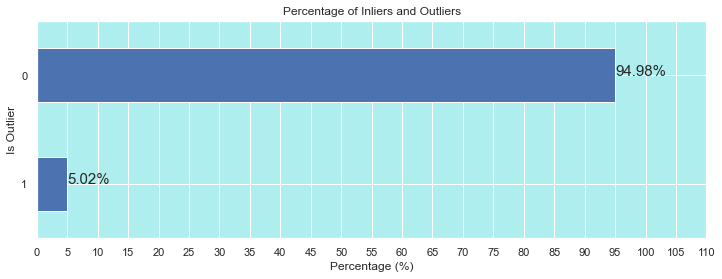

In [51]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12,4))
outlier_percentage.plot(kind='barh')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

### Inferences
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
 
- Our algorithm has identified **5%** of the data as outlier.
    

### Strategy
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis. 

Let's proceed with the following steps:

- Separate the identified outliers for further analysis and save them as a separate file (optional).
- Remove the outliers from the main dataset to prevent them from influencing the clustering process.
- Drop the `Outlier_Scores` and `Is_Outlier` columns as they were auxiliary columns used for the outlier detection process.

Let's implement these steps:

In [52]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)
print(customer_data_cleaned.tail())

     CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
4062    18280.0                       277                   1   
4063    18281.0                       180                   1   
4064    18282.0                         7                   3   
4065    18283.0                         3                  16   
4066    18287.0                        42                   3   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
4062                        45       180.60                 180.600000   
4063                        54        80.82                  80.820000   
4064                        98       176.60                  58.866667   
4065                      1355      2039.58                 127.473750   
4066                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
4062                         10                        0.000000            0   
4063

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

We have successfully separated the outliers for further analysis and cleaned our main dataset by removing these outliers. This cleaned dataset is now ready for the next steps in our customer segmentation project, which includes scaling the features and applying clustering algorithms to identify distinct customer segments.

## 6. CORRELATION ANALYSIS
<div style="border-radius:2px; padding: 5px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of __multicollinearity__, where __features are highly correlated__, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.

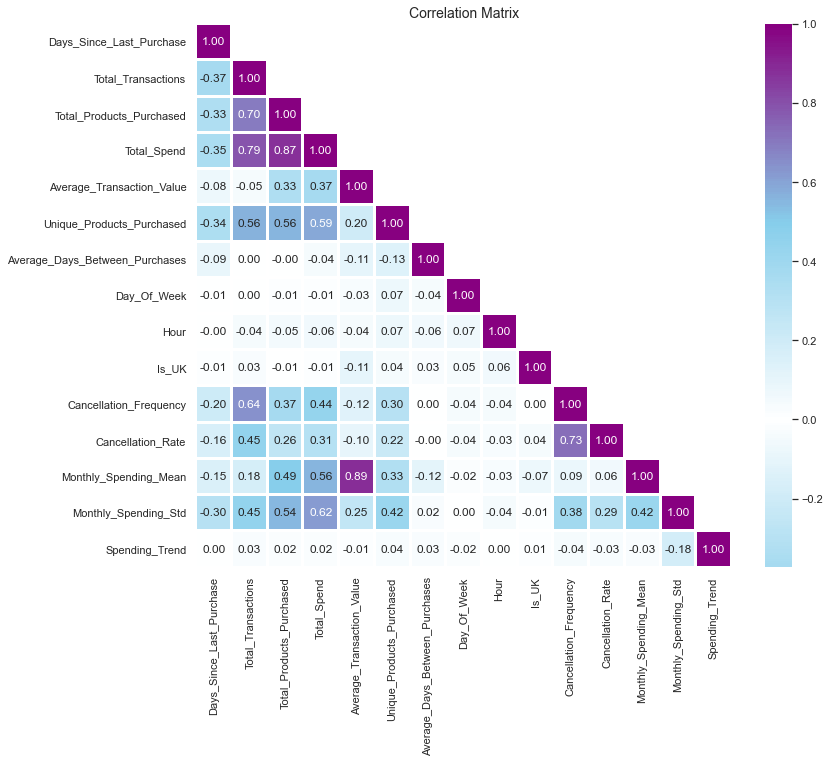

In [53]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#870080', '#87ceeb', 'white', '#87ceeb', '#870080']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

### Inferences
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

- `Monthly_Spending_Mean` and `Average_Transaction_Value`
    
    
- `Total_Spend` and `Total_Products_Purchased`

    
- `Total_Transactions` and `Total_Spend`
    
    
- `Cancellation_Rate` and `Cancellation_Frequency`
    
    
- `Total_Transactions` and `Total_Products_Purchased`
 
    
These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
Before proceeding with KMeans clustering, let us consider the impacts of multicollinearity:
- **Potential Impact**: Multicollinearity can lead to unstable clusters in KMeans.
- **Mitigation Strategy**: Address multicollinearity through dimensionality reduction techniques like PCA.
- **Benefit**: PCA creates a set of uncorrelated variables, leading to more stable KMeans clusters.

## 7. FEATURE SCALING
<div style="border-radius:2px; padding: 5px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

  - __For K-means Clustering__: K-means relies heavily on the concept of '__distance__' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.
  
    
  - __For PCA__: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data.

### Methodology
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
   
Therefore, to ensure a balanced influence on the model and to reveal the true patterns in the data, I am going to standardize our data, meaning transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features require scaling. Here are the exceptions and the reasons why they are excluded:

- __CustomerID__: This feature is just an identifier for the customers and does not contain any meaningful information for clustering.
    
    
- __Is_UK__: This is a binary feature indicating whether the customer is from the UK or not. Since it already takes a value of 0 or 1, scaling it won't make any significant difference.
    
    
- __Day_Of_Week__: This feature represents the most frequent day of the week that the customer made transactions. Since it's a categorical feature represented by integers (1 to 7), scaling it would not be necessary.

    
We will proceed to scale the other features in the dataset to prepare it for PCA and K-means clustering.

In [54]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                  2.345802           -0.477589   
1    12347.0                 -0.905575            0.707930   
2    12348.0                 -0.170744           -0.003381   
3    12349.0                 -0.744516           -0.714692   
4    12350.0                  2.194809           -0.714692   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                 -0.754491    -0.813464                  -1.317106   
1                  2.005048     2.366920                   1.528132   
2                  1.863591     0.247087                   0.343279   
3                 -0.047205     0.262074                   5.418285   
4                 -0.534446    -0.596223                   0.043327   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                  -0.908471                       -0.310564            1   
1                   0.815119                       -0.128438            1   
2                  -0.570512                        0.672476            3   
3                   0.291283                       -0.310564            0   
4                  -0.655002                       -0.310564            2   

       Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0 -1.086929      1                0.420541           0.417623   
1  0.647126      0               -0.545753          -0.432111   
2  2.814696      0               -0.545753          -0.432111   
3 -1.520443      0               -0.545753          -0.432111   
4  1.514154      0               -0.545753          -0.432111   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0              -1.329018             -0.713318        0.090868  
1               0.989511              1.259961        0.116774  
2               0.023997              0.466213       -0.491708  
3               4.159521             -0.713318        0.090868  
4              -0.220428             -0.713318        0.090868

## 8. DIMENSIONALITY REDUCTION
<div style="border-radius:2px; padding: 5px; background-color: #870080; font-size:10%; text-align:left">

### The Need For Dimensionality Reduction
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
- **Addressing Multicollinearity:**
    * Dimensionality reduction techniques like PCA can be employed to mitigate multicollinearity identified in the data.
    * This reduces redundant information and creates uncorrelated features, leading to more stable K-means clusters.
* **Enhanced K-means Performance:**
    * By reducing dimensionality, we address the challenges posed by a large number of features in K-means.
    * This helps K-means identify tighter and more well-separated clusters by focusing on the most relevant information.
* **Improved Cluster Quality:**
    * Dimensionality reduction can potentially remove noise in the data, leading to more accurate and robust clusters.
* **Benefits for Visualization:**
    * In customer segmentation, dimensionality reduction allows visualization of customer groups in lower dimensions (e.g., 2D or 3D), facilitating easier interpretation of cluster patterns.
* **Increased Computational Efficiency:**
    * Reducing the number of features leads to faster model training times, making the clustering process more efficient.

### Pricipal Component Analysis
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

 * **Dimensionality Reduction Approach:**
    * **Initial Method:** Principal Component Analysis (PCA) will be employed to simplify the data while preserving key information.
    * **Rationale for PCA:**
        * Well-suited for capturing linear relationships, addressing the multicollinearity identified in the dataset.
        * Reduces feature space while retaining significant information, potentially enhancing clustering accuracy and interpretability.
        * Computationally efficient, minimizing processing time impact.
    * **Openness to Alternative Methods:**
        * We reserve the right to explore non-linear methods (e.g., KernelPCA, ICA, ISOMAP, t-SNE, UMAP) if PCA's initial components fail to capture sufficient variance.
        * These methods offer a more intricate approach to dimensionality reduction, potentially capturing complex non-linear patterns at the expense of increased computational complexity. 

### Methodology
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    We will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis:
    

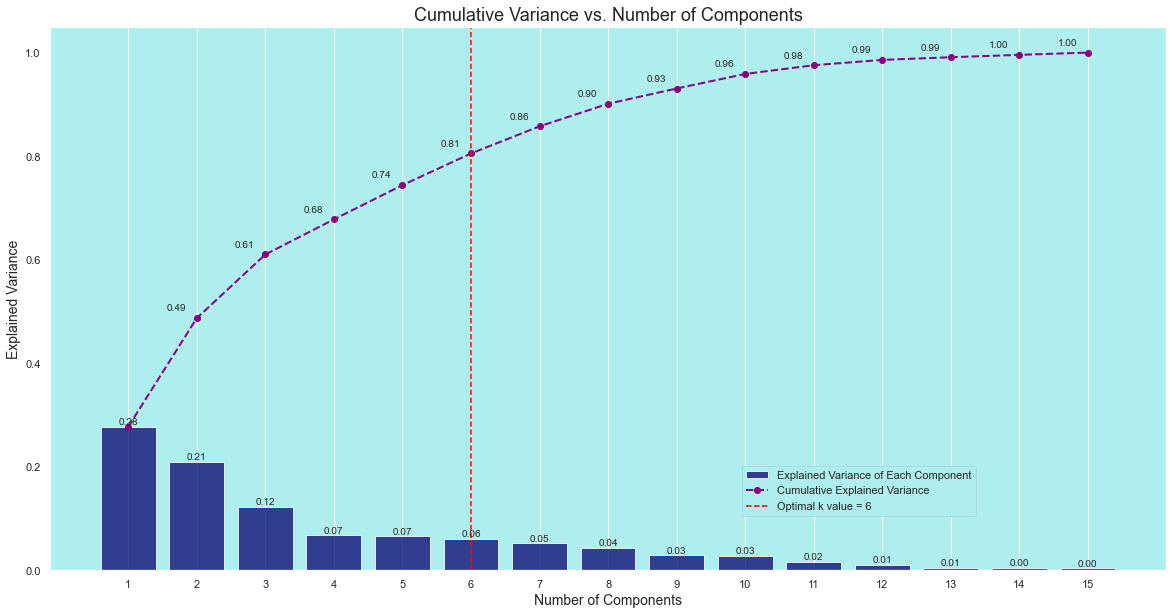

In [55]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#afeeee'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#00008b',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#870080', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='lightblue')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

### Conclusion
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
 The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components.

Here, we can observe that:

- The first component explains approximately 28% of the variance.

- The first two components together explain about 49% of the variance.

- The first three components explain approximately 61% of the variance, and so on.

    
To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "__elbow point__" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the __6th component__ (which __captures about 81% of the total variance__).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining __the first 6 components__ might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.   

In [56]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [57]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
CustomerID                                                            
12346.0    -2.186469 -1.705370 -1.576745  1.008187 -0.411803 -1.658012
12347.0     3.290264 -1.387375  1.923310 -0.930990 -0.010591  0.873150
12348.0     0.584684  0.585019  0.664727 -0.655411 -0.470280  2.306657
12349.0     1.791116 -2.695652  5.850040  0.853418  0.677111 -1.520098
12350.0    -1.997139 -0.542639  0.578781  0.183682 -1.484838  0.062672

In [58]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #87ceeb' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

## 9. MODEL TRAINING
<div style="border-radius:2px; padding: 5px; background-color: #870080; font-size:10%; text-align:left">

### K-MEANS CLUSTERING
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
__K-Means__ is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the __within-cluster sum-of-squares (WCSS)__, also known as __inertia__. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached.

### Drawbacks
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
-  __Inertia is influenced by the number of dimensions__: The value of inertia tends to increase in high-dimensional spaces due to the curse of dimensionality, which can distort the Euclidean distances between data points.

 __Solution:__ Performing dimensionality reduction, such as __PCA__, before applying K-means to alleviate this issue and speed up computations.
    
 
    
-  __Dependence on Initial Centroid Placement__: The K-means algorithm might find a local minimum instead of a global minimum, based on where the centroids are initially placed.

 __Solution:__ To enhance the likelihood of locating the global minimum, we can employ the __k-means++ initialization__ method.
  

    
-  __Requires specifying the number of clusters__: K-means requires specifying the number of clusters (K) beforehand, which may not be known in advance.

 __Solution:__ Using methods such as the __elbow method__ and __silhouette analysis__ to estimate the optimal number of clusters.
    
     
    
-  __Sensitivity to unevenly sized or sparse clusters__: K-means might struggle with clusters of different sizes or densities.

 __Solution:__ Increasing the number of random initializations (n_init) or consider using algorithms that handle unevenly sized clusters better, like GMM or DBSCAN.
    

    
-  __Assumes convex and isotropic clusters__: K-means assumes that clusters are spherical and have similar variances, which is not always the case. It may struggle with elongated or irregularly shaped clusters.
    
 __Solution:__ Considering using clustering algorithms that do not make these assumptions, such as DBSCAN or Gaussian Mixture Model (GMM).
    
    <img src="https://github.com/FarzadNekouee/Retail_Customer_Segmentation_Recommendation_System/blob/master/kmeans_drawbacks.jpg?raw=true" width="2400">
    
___
    
Taking into account the aforementioned considerations, I initially applied PCA to the dataset. For the KMeans algorithm, I will set the `init` parameter to `k-means++` and `n_init` to `10`. To determine the optimal number of clusters, I will employ the elbow method and silhouette analysis. Additionally, it might be beneficial to explore the use of alternative clustering algorithms such as GMM and DBSCAN in future analyses to potentially enhance the segmentation results.

### DBSCAN
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

- **Introduction**: DBSCAN is a popular clustering algorithm widely used in machine learning and data mining.
  
- **Density-Based Clustering**: Unlike traditional centroid-based clustering algorithms like K-means, DBSCAN identifies clusters based on the density of data points in the feature space rather than distance to a centroid.
  
- **Core Points and Density Reachability**: DBSCAN categorizes points as core points, border points, or noise points. A core point is a point that has at least a minimum number of points (specified by `min_samples`) within a specified distance (`eps`). Points within the `eps` neighborhood of a core point are considered density-reachable.

- **Noise Points**: Points that are not core points and do not have enough neighbors to be density-reachable are classified as noise points. These points do not belong to any cluster.

- **Advantages**:
  - Capable of identifying clusters of arbitrary shapes.
  - Robust to outliers and noise due to its ability to label such points as noise.

- **Parameters**:
  - `eps`: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
  - `min_samples`: The number of samples in a neighborhood for a point to be considered as a core point.

- **Applications**: DBSCAN is commonly used in various fields, including spatial data analysis, anomaly detection, and customer segmentation.

- **Limitations**:
  - Sensitivity to the choice of `eps` and `min_samples` parameters.
  - Struggles with datasets of varying densities or high-dimensional data.

- **Conclusion**: DBSCAN is a powerful clustering algorithm known for its ability to discover clusters of arbitrary shapes while being robust to noise. Understanding its parameters and characteristics is essential for effective application in clustering tasks.

### 9.1. Determining Optimal Number of Clusters
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
To ascertain the optimal number of clusters (k) for segmenting customers, We will explore two renowned methods:

* __Elbow Method__

* __Silhouette Method__

    
It's common to utilize both methods in practice to corroborate the results.

### 9.1.1. Elbow Method
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the __inertia__ or __WCSS__ score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "__Elbow Method__". The __elbow point__ represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

In [61]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


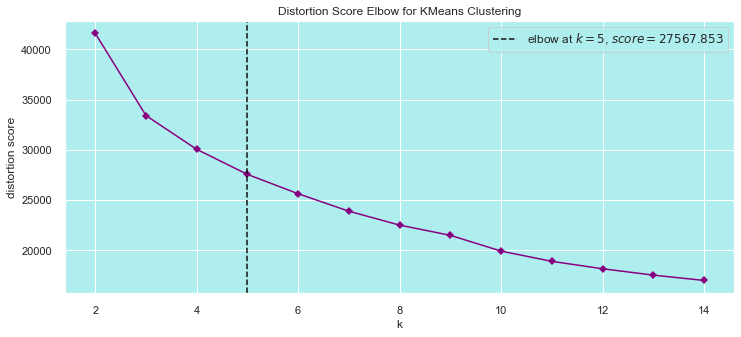

In [62]:
# Configure Seaborn plot styles: Set background color and use dark grid 
sns.set(rc={'axes.facecolor' : '#afeeee'}, style='darkgrid')

# Set the color palette for the plot
sns.set_palette(['#870080'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

### Insights
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
The optimal value of k for the KMeans clustering algorithm can be found at the __elbow point__. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is __5__. However, __we don't have a very distinct elbow point in this case__, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that __the optimum value of k could be between 3 and 7__. To choose the best k within this range, we can employ the __silhouette analysis__, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

### 9.1.2. Silhouette Method
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
The __Silhouette Method__ is an approach to find the optimal number of clusters in a dataset by evaluating the consistency within clusters and their separation from other clusters. It computes the __silhouette coefficient for each data point__, which measures how similar a point is to its own cluster compared to other clusters.

### Silhouette Coefficient
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
The silhouette coefficient quantifies the similarity of a point to its own cluster (cohesion) relative to its separation from other clusters. This value ranges from -1 to 1, with higher values signifying that the point is well aligned with its cluster and has a low similarity to neighboring clusters. 
    
To determine the silhouette coefficient for a given point i, follow these steps:

* __Calculate a(i)__: Compute the average distance between point i and all other points within its cluster.
* __Calculate b(i)__: Compute the average distance between point i and all points in the nearest cluster to its own.
* __Compute the silhouette coefficient__, s(i), for point i using the following formula: 
    
    $$ s(i) = \frac{b(i) - a(i)}{\max(b(i), a(i))} $$

### Silhouette Score
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
The __silhouette score__ is the __average silhouette coefficient__ calculated for all data points in a dataset. It provides an overall assessment of the clustering quality, taking into account both cohesion within clusters and separation between clusters. A higher silhouette score indicates a better clustering configuration.    
    

### Advantages
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
* The __Silhouette Method__ evaluates cluster quality by considering __both__ the __cohesion within clusters__ and their __separation__ from other clusters. This provides a more comprehensive measure of clustering performance compared to the __Elbow Method__, which only considers the __inertia__ (sum of squared distances within clusters).


* The __Silhouette Method__ produces a silhouette score that directly quantifies the quality of clustering, making it easier to compare different values of k. In contrast, the __Elbow Method__ relies on the subjective interpretation of the elbow point, which can be less reliable in cases where the plot does not show a clear elbow.

    
* The __Silhouette Method__ generates a visual representation of silhouette coefficients for each data point, allowing for easier identification of fluctuations and outliers within clusters. This helps in determining the optimal number of clusters with higher confidence, as opposed to the __Elbow Method__, which relies on visual inspection of the inertia plot.

### Methodology
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
In the following analysis:

- We will initially choose a range of 2-6 for the number of clusters (k) based on the Elbow method from the previous section. Next, we will plot __Silhouette scores__ for each k value to determine the one with the highest score.


- Subsequently, to fine-tune the selection of the most appropriate k, we will generate __Silhouette plots__ that visually display the __silhouette coefficients for each data point within various clusters__.


The __YellowBrick__ library will be utilized once again to create these plots and facilitate a comparative analysis.

In [63]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkblue'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#87ceeb', edgecolor='#870080', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

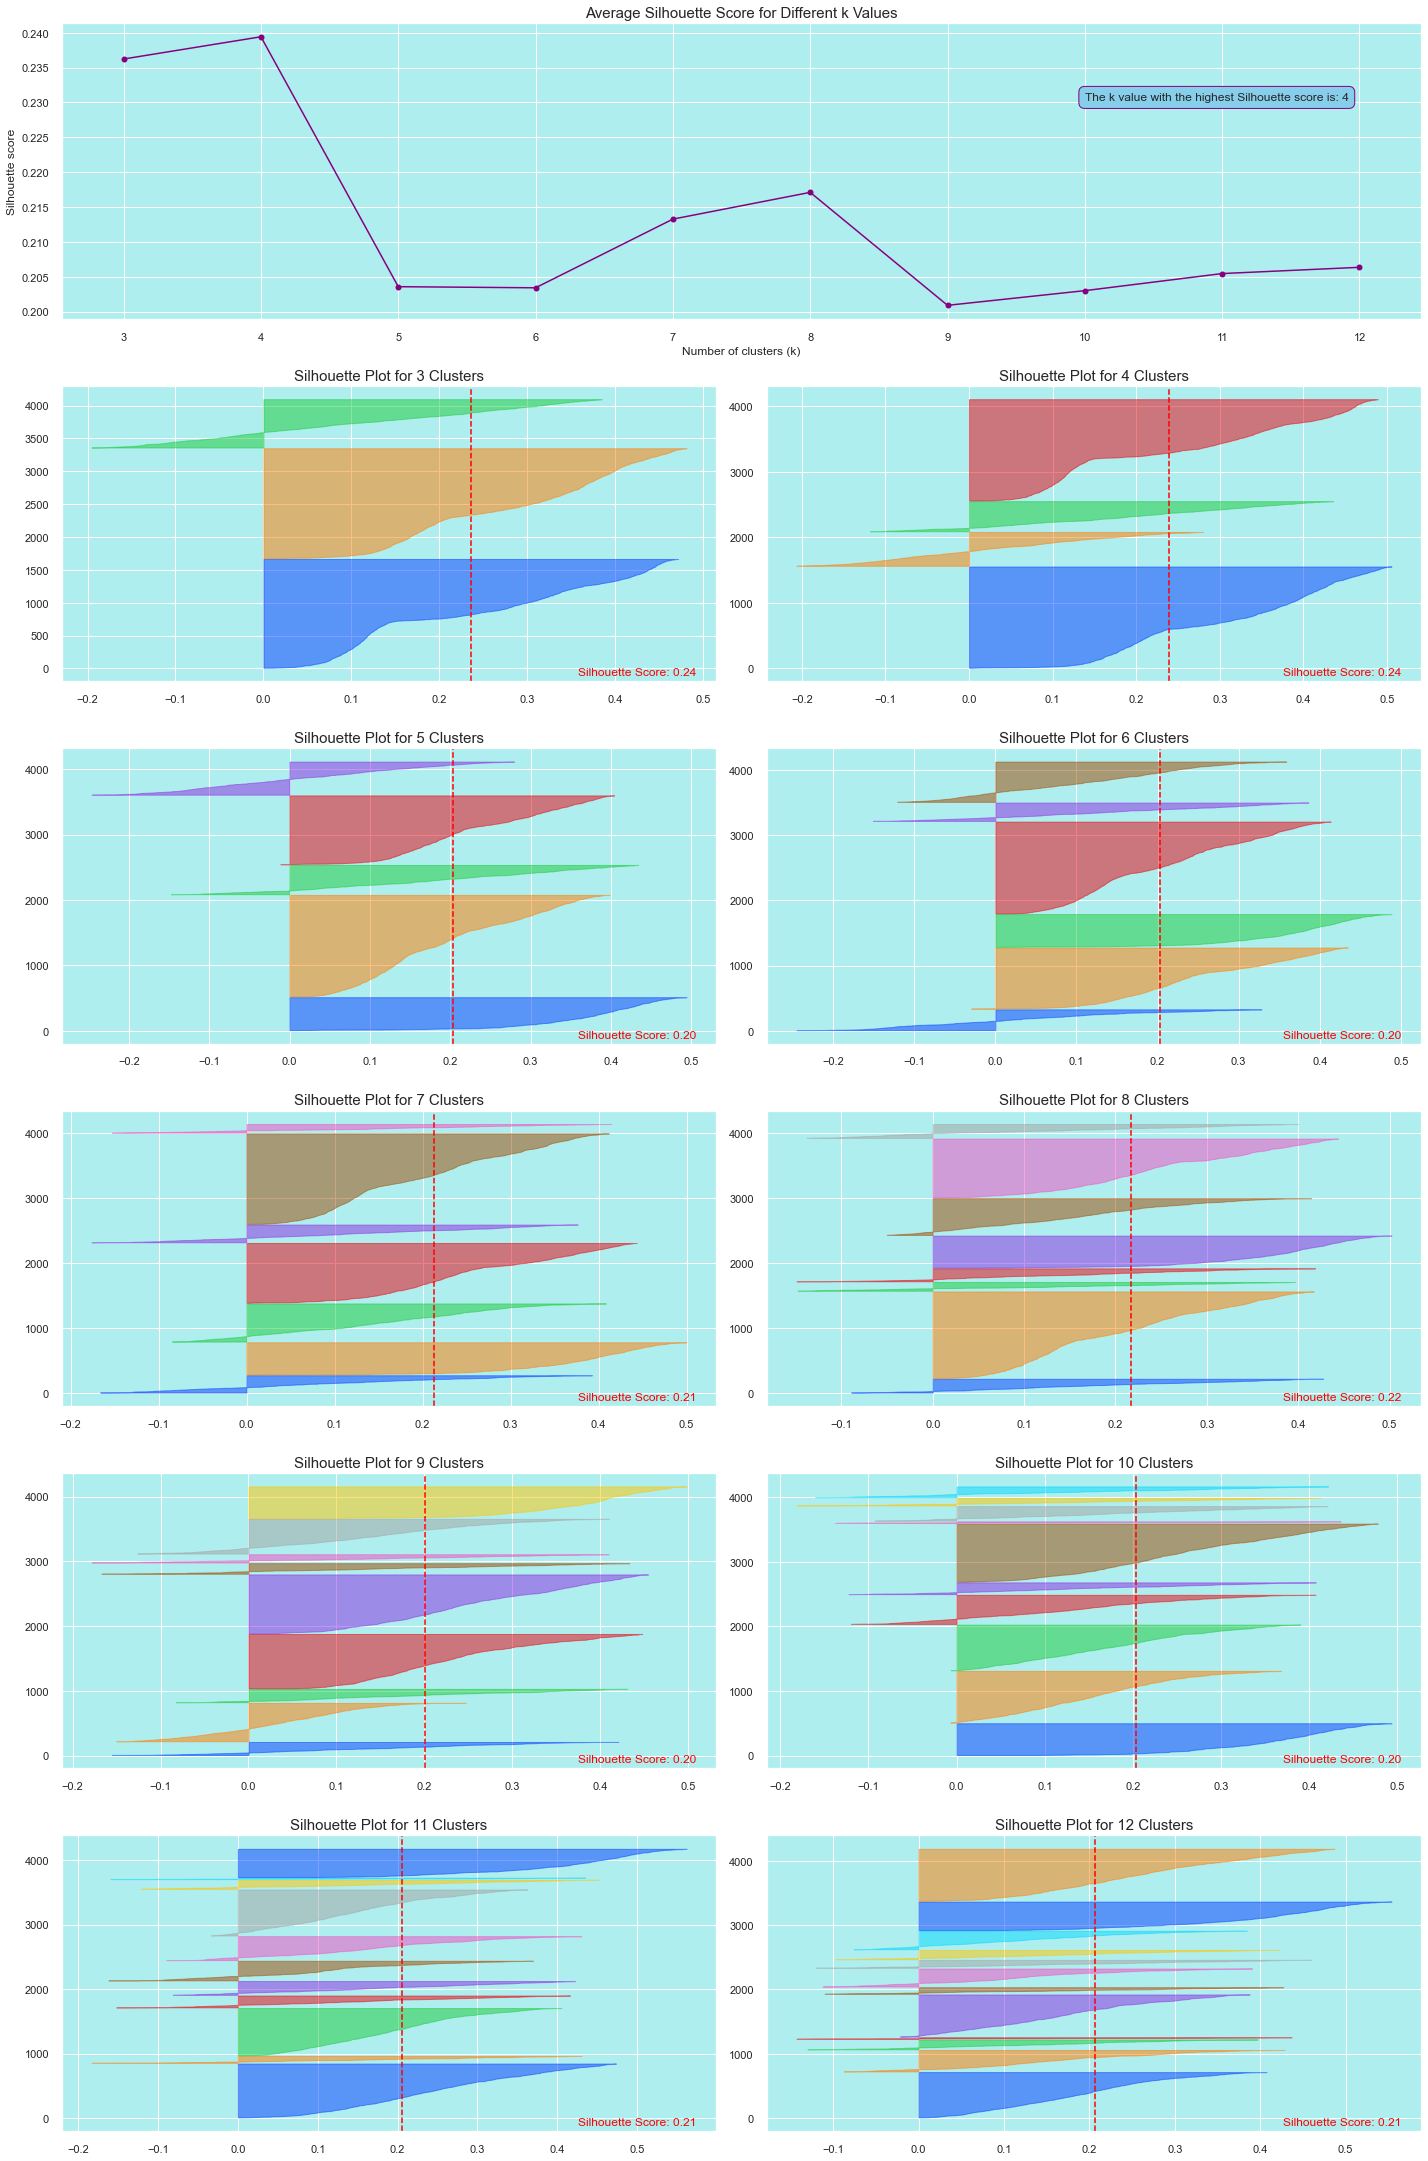

In [64]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

### Interpretation of Silhouette Plots & Determination of Optimal K
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
To interpret silhouette plots and identify the optimal number of clusters (\( k \)), consider the following criteria:

- 1. __Analyze the Silhouette Plots__:
   
   * __Silhouette Score Width__:
        - __Wide Widths (closer to +1)__: Indicate that the data points in the cluster are well separated from points in other clusters, suggesting well-defined clusters.
        - __Narrow Widths (closer to -1)__: Show that data points in the cluster are not distinctly separated from other clusters, indicating poorly defined clusters.
   
   * __Average Silhouette Score__:
        - __High Average Width__: A cluster with a high average silhouette score indicates well-separated clusters.
        - __Low Average Width__: A cluster with a low average silhouette score indicates poor separation between clusters.


    
    
- 2. __Uniformity in Cluster Size__:
   
   2.1 __Cluster Thickness__:
   - __Uniform Thickness__: Indicates that clusters have a roughly equal number of data points, suggesting a balanced clustering structure.
   - __Variable Thickness__: Signifies an imbalance in the data point distribution across clusters, with some clusters having many data points and others too few.


    
    
- 3. __Peaks in Average Silhouette Score__:
   - __Clear Peaks__: A clear peak in the __average__ silhouette score plot for a specific \( k \) value indicates this \( k \) might be optimal.


    
    
- 4. __Minimize Fluctuations in Silhouette Plot Widths__:
   - __Uniform Widths__: Seek silhouette plots with similar widths across clusters, suggesting a more balanced and optimal clustering.
   - __Variable Widths__: Avoid wide fluctuations in silhouette plot widths, indicating that clusters are not well-defined and may vary in compactness.


    
    
- 5. __Optimal Cluster Selection__:
   - __Maximize the Overall Average Silhouette Score__: Choose the \( k \) value that gives the highest average silhouette score across all clusters, indicating well-defined clusters.
   - __Avoid Below-Average Silhouette Scores__: Ensure most clusters have above-average silhouette scores to prevent suboptimal clustering structures.


    
    
- 6. __Visual Inspection of Silhouette Plots__:
   - __Consistent Cluster Formation__: Visually inspect the silhouette plots for each \( k \) value to evaluate the consistency and structure of the formed clusters.
   - __Cluster Compactness__: Look for more compact clusters, with data points having silhouette scores closer to +1, indicating better clustering.

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing __\( k = 3 \)__ is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

### 9.2. Clustering Model : K-Means
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
In this step, we are going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [65]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [66]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    10      1                     1.0                0.5   
1    14      0                     0.0                0.0   
2    19      0                     0.0                0.0   
3     9      0                     0.0                0.0   
4    16      0                     0.0                0.0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  cluster  
0               0.000000              0.000000        0.000000        2  
1             615.714286            341.070789        4.486071        0  
2             359.310000            203.875689     -100.884000        1  
3            1457.550000              0.000000        0.000000        2  
4             294.400000              0.000000        0.000000        2

In [67]:
# Make a copy of the dataset for DBSCAN model
customer_data_pca2 = customer_data_pca.copy()

customer_data_pca2.head()

PC1       PC2       PC3       PC4       PC5       PC6  \
CustomerID                                                               
12346.0    -2.186469 -1.705370 -1.576745  1.008187 -0.411803 -1.658012   
12347.0     3.290264 -1.387375  1.923310 -0.930990 -0.010591  0.873150   
12348.0     0.584684  0.585019  0.664727 -0.655411 -0.470280  2.306657   
12349.0     1.791116 -2.695652  5.850040  0.853418  0.677111 -1.520098   
12350.0    -1.997139 -0.542639  0.578781  0.183682 -1.484838  0.062672   

            cluster  
CustomerID           
12346.0           2  
12347.0           0  
12348.0           1  
12349.0           2  
12350.0           2

In [68]:
from sklearn.cluster import DBSCAN

# Create DBSCAN object
dbscan = DBSCAN(eps=1.0, min_samples=10)

# Fit DBSCAN to the PCA-transformed dataset
dbscan.fit(customer_data_pca2.drop(columns=['cluster']))  # Exclude the 'cluster' column from PCA data

# Get the cluster labels
dbscan_labels = dbscan.labels_

# Append the DBSCAN cluster labels to the original dataset
customer_data_cleaned['dbscan_cluster'] = dbscan_labels

# Append the DBSCAN cluster labels to the PCA version of the dataset
customer_data_pca2['dbscan_cluster'] = dbscan_labels


In [69]:
customer_data_cleaned.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    10      1                     1.0                0.5   
1    14      0                     0.0                0.0   
2    19      0                     0.0                0.0   
3     9      0                     0.0                0.0   
4    16      0                     0.0                0.0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  cluster  \
0               0.000000              0.000000        0.000000        2   
1             615.714286            341.070789        4.486071        0   
2             359.310000            203.875689     -100.884000        1   
3            1457.550000              0.000000        0.000000        2   
4             294.400000              0.000000        0.000000        2   

   dbscan_cluster  
0              -1  
1              -1  
2              -1  
3              -1  
4               0

## 10. CLUSTERING EVALUATION
<div style="border-radius:2px; padding: 5px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

After determining the optimal number of clusters (which is 3 in our case) using elbow and silhouette analyses, I move onto the evaluation step to assess the quality of the clusters formed. This step is essential to validate the effectiveness of the clustering and to ensure that the clusters are __coherent__ and __well-separated__. The evaluation metrics and a visualization technique I plan to use are outlined below:
    
-  __3D Visualization of Top PCs__ 

    
-  __Cluster Distribution Visualization__ 
    
    
-  __Evaluation Metrics__ 
    
    * Silhouette Score
    * Calinski Harabasz Score
    * Davies Bouldin Score
       
____  
    
**Note**: We are using the PCA version of the dataset for evaluation because this is the space where the clusters were actually formed, capturing the most significant patterns in the data. Evaluating in this space ensures a more accurate representation of the cluster quality, helping us understand the true cohesion and separation achieved during clustering. This approach also aids in creating a clearer 3D visualization using the top principal components, illustrating the actual separation between clusters.

### 10.1. Evaluation Metrics
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
To further scrutinize the quality of our clustering, I will employ the following metrics:

- __Silhouette Score__: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
    
    
- __Calinski Harabasz Score__: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.

    
- __Davies Bouldin Score__: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.    

In [70]:
# Evaluation of K-Means Clustering

# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        4067        |
|    Silhouette Score     | 0.2362284801709889 |
| Calinski Harabasz Score | 1257.1747766540655 |
|  Davies Bouldin Score   | 1.3682695376074658 |
+-------------------------+--------------------+


In [71]:
# Evaluation of DBSCAN

# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca2.drop('dbscan_cluster', axis=1)
clusters = customer_data_pca2['dbscan_cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        4067        |
|    Silhouette Score     | 0.1705990856651036 |
| Calinski Harabasz Score | 660.4112935084645  |
|  Davies Bouldin Score   | 1.8188645606527842 |
+-------------------------+--------------------+


### 10.1.1. Comparison of Evaluation Metrics
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
- The **K-Means Clustering** model has a higher Silhouette Score (0.236 > 0.174), indicating _better separation between clusters_.
- The **K-Means Clustering** model also has a significantly higher Calinski Harabasz Score (1257.17 > 659.65), suggesting _denser and more well-separated clusters_.
- The **K-Means Clustering** model has a lower Davies Bouldin Score (1.368 < 1.823), indicating _better clustering with lower intra-cluster distances and higher inter-cluster distances_.
                                                                                    
Based on these comparisons, the **K-Means Clustering model performs better than DBSCAN** according to all three evaluation metrics. Therefore, we will base our further based on its results.

### Inference of K-Means Evaluation Scores
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
- The __Silhouette Score__ of approximately 0.236, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.

    
- The __Calinski Harabasz Score__ is 1257.17, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.

    
- The __Davies Bouldin Score__ of 1.37 is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.


In conclusion, the metrics suggest that the clustering is of good quality, with clusters being well-defined and fairly separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.

### 10.2. 3D Visualization of top Principal Component
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

In [72]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [73]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#afeeee", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#afeeee", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#afeeee", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

### 10.3. Cluster Distribution Visualization
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
    
We will be utilizing a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant:

In [74]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

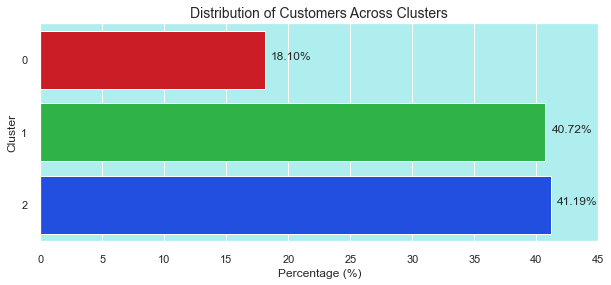

In [75]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

### Inferences
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

* **Balanced Customer Distribution Across Clusters:** The bar chart reveals a **fairly even spread** of customers across the clusters. Notably, Clusters 1 and 2 each hold around **41%**, while Cluster 0 encompasses approximately **18%**.

* **Successful Clustering Process:** This **balanced distribution** signifies a successful clustering process. It indicates the clusters haven't simply grouped noise or outliers, but rather identified **meaningful patterns** within the data.

* **Distinct Customer Segments:** Each cluster likely represents a **substantial and distinct segment** of the customer base. This offers valuable insights for developing future business strategies.

* **Significance of Each Cluster:** The absence of clusters with very few customers assures us that each one is **significant**. They don't merely represent outliers or noise in the data. This structure allows for a more **nuanced understanding** and analysis of different customer segments, ultimately facilitating **effective and informed decision-making**.


## 11. CLUSTER ANALYSIS & PROFILING
<div style="border-radius:2px; padding: 5px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

In this section, We are going to analyze the characteristics of each cluster to understand the distinct behaviors and preferences of different customer segments and also profile each cluster to identify the key traits that define the customers in each cluster.

### Histogram Chart Approach
<div style="border-radius:2px; padding: 2px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">
We can plot histograms for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster.

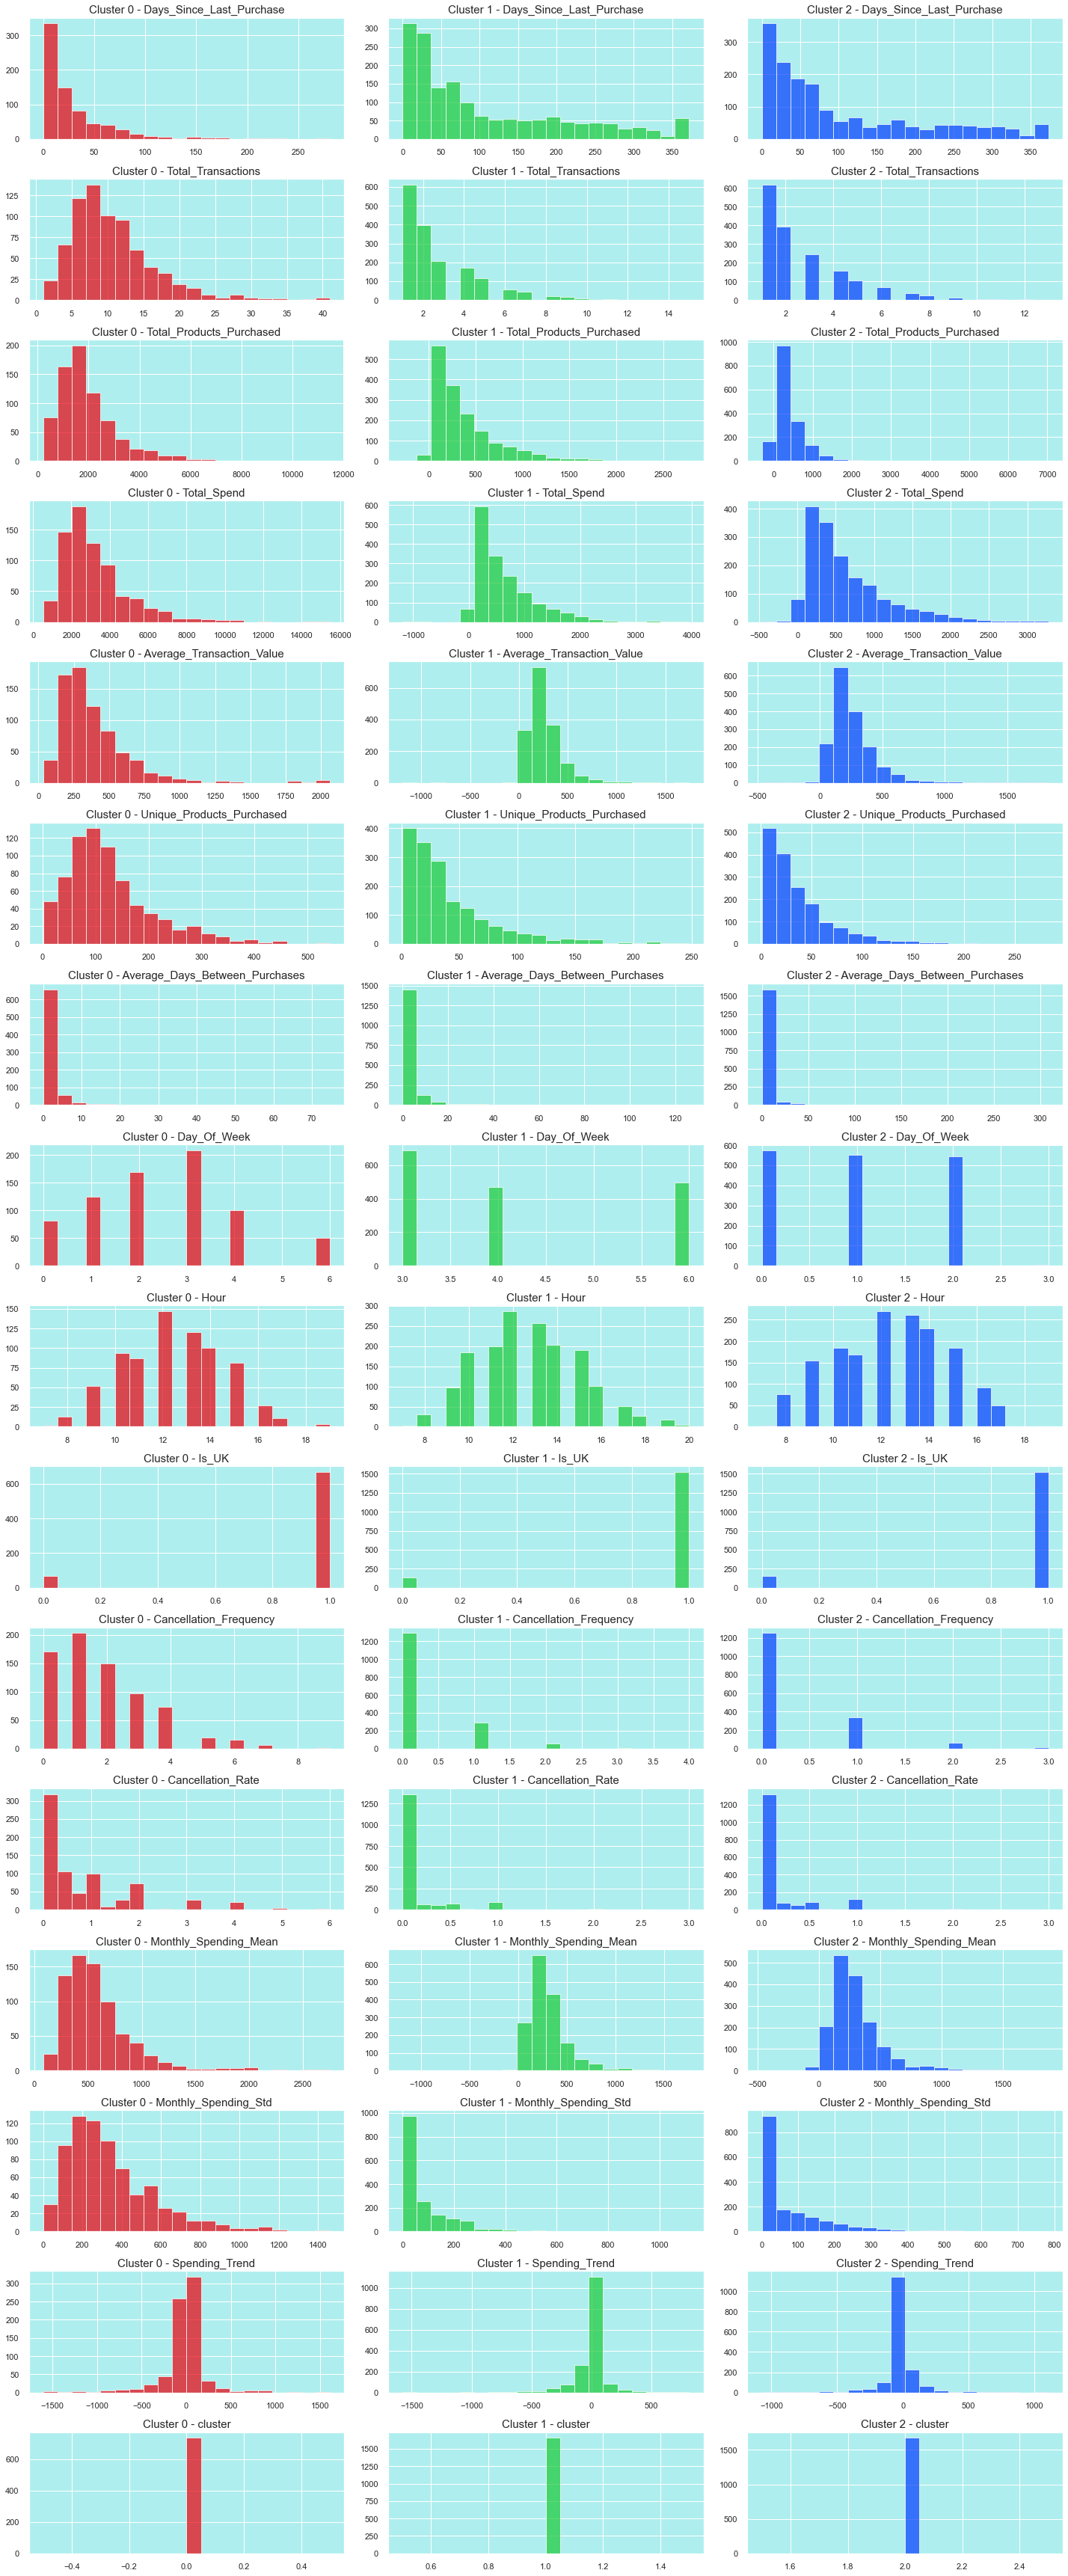

In [76]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

### Cluster 0 :IMPULSIVE EARLY PURCHASERS
<div style="border-radius:2px; padding: 2px; background-color: #e8000b; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #d3d3d3; font-size:120%; text-align:left">

<span style="color: #e8000b;">

This cluster is characterized by:

* **High Spenders:** Customers here exhibit high spending habits, purchasing a wide variety of unique products across numerous transactions.
* **Potential Impulsiveness:**  Despite high spending, a significant portion of their transactions are cancelled, suggesting impulsive buying behavior. 
* **Early Bird Activity:** They tend to shop during the early hours, possibly due to time constraints before daily commitments or to take advantage of early-bird deals.
* **Variable Spending Patterns:**  Their monthly spending fluctuates considerably, indicating less predictable shopping habits.
* **Shifting Trends:** Interestingly, their overall spending trend shows a slight decline, potentially signaling a future change in their shopping behavior. </span>

### Cluster 1 : TARGETED WEEKEND SHOPPERS
<div style="border-radius:2px; padding: 2px; background-color: #1ac938; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #d3d3d3; font-size:120%; text-align:left">

<span style="color: #1ac938;">
    


This cluster is characterized by:

* **Lower Purchase Frequency & Spend:** Compared to other segments, these customers shop less frequently and spend less overall. 
* **Fewer Transactions & Products:** They typically have a smaller number of transactions and purchase fewer products per shopping trip. 
* **Weekend Shopping Preference:** They exhibit a preference for shopping during weekends, suggesting a more casual browsing or window-shopping approach.
* **Stable Spending Patterns:** Their monthly spending remains quite consistent with minimal fluctuations. 
* **Decisive Purchases:** They rarely cancel transactions, indicating a more decisive shopping style.
* **Lower Transaction Value:** When they do shop, their average spending per transaction tends to be lower compared to other clusters. </span>


### Cluster 2 : IRREGULAR HIGH-VALUE BUYERS
<div style="border-radius:2px; padding: 2px; background-color: #023eff; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #d3d3d3; font-size:120%; text-align:left">

<span style="color: #023eff;">
    

This cluster is defined by the following characteristics:

* **Infrequent Shopping with High Spends:** They make purchases infrequently but spend significantly when they do, often buying a variety of products. 
* **Increasing Expenditure:** Their spending has been on the rise, suggesting a growing interest or investment in their purchases.
* **Later Shopping Hours:** They tend to shop later in the day, possibly after work hours.
* **UK-Based Customers:** This customer segment is primarily located in the UK. 
* **Moderate Cancellations:** They exhibit a moderate tendency to cancel transactions, which could be due to reevaluating higher-priced purchases.
* **Substantial Purchases:** Their purchases are generally of larger value, indicating a preference for quality or premium products. </span>

## 12. RECOMMENDATION SYSTEM
<div style="border-radius:2px; padding: 5px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

We are in the final phase of this project, developing a recommendation system to personalize the online shopping experience. This system will suggest products tailored to each customer based on their cluster's purchasing patterns.

**Key Steps:**

* **Leveraging Customer Data:**
    * We analyzed the **cleansed customer data** (excluding the 5% outlier group) to identify the **top-selling products within each cluster**.

* **Personalized Recommendations:**
    * The system will use this information to craft **personalized recommendations**. 
    * Each customer will be suggested the **top 3 products** popular in their cluster that they haven't purchased yet.

**Benefits:**

* **Targeted Marketing:** This approach facilitates **targeted marketing strategies** by focusing on products relevant to each customer segment.
* **Enhanced Shopping Experience:** Personalized recommendations enrich the **personal shopping experience**, potentially leading to **increased sales**.

**Outlier Group Approach:**

* A basic strategy for the **outlier group** (5% of customers) could involve recommending **random products**. This serves as a starting point to engage them and understand their preferences. 

In [77]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [71]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

Rec1_StockCode                     Rec1_Description Rec2_StockCode  \
CustomerID                                                                      
13243.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
13232.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
14997.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
14948.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
12596.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
16686.0             22616           PACK OF 12 LONDON TISSUES          85099B   
17101.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
14954.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
18123.0             18007  ESSENTIAL BALM 3.5G TIN IN ENVELOPE          84879   
14051.0             84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS         85099B   

                         Rec2_Description Rec3_StockCode  \
CustomerID                                                 
13243.0     ASSORTED COLOUR BIRD ORNAMENT          15036   
13232.0     ASSORTED COLOUR BIRD ORNAMENT          15036   
14997.0     ASSORTED COLOUR BIRD ORNAMENT          17003   
14948.0     ASSORTED COLOUR BIRD ORNAMENT          17003   
12596.0     ASSORTED COLOUR BIRD ORNAMENT          17003   
16686.0           JUMBO BAG RED RETROSPOT          84879   
17101.0     ASSORTED COLOUR BIRD ORNAMENT          17003   
14954.0     ASSORTED COLOUR BIRD ORNAMENT          15036   
18123.0     ASSORTED COLOUR BIRD ORNAMENT          17003   
14051.0           JUMBO BAG RED RETROSPOT          84879   

                         Rec3_Description  
CustomerID                                 
13243.0         ASSORTED COLOURS SILK FAN  
13232.0         ASSORTED COLOURS SILK FAN  
14997.0               BROCADE RING PURSE   
14948.0               BROCADE RING PURSE   
12596.0               BROCADE RING PURSE   
16686.0     ASSORTED COLOUR BIRD ORNAMENT  
17101.0               BROCADE RING PURSE   
14954.0         ASSORTED COLOURS SILK FAN  
18123.0               BROCADE RING PURSE   
14051.0     ASSORTED COLOUR BIRD ORNAMENT

## 13. CONCLUSION
<div style="border-radius:2px; padding: 5px; background-color: #870080; font-size:10%; text-align:left">

<div style="border-radius:2px; padding: 15px; background-color: #87ceeb; font-size:120%; text-align:left">

- The **implementation of a customer segmentation model** using the K-means clustering algorithm can be instrumental in optimizing marketing strategies and boosting.

- Through meticulous data preprocessing, feature engineering, and segmentation analysis, **three distinct customer segments** with unique profiles and preferences were identified.

- The development of a **recommendation system further enhances the impact of the segmentation model** by delivering personalized product suggestions to customers, thereby increasing customer engagement and driving incremental sales revenue.

---
Overall, the successful execution of this project underscores the significance of leveraging data science methodologies to unlock valuable insights from customer data, empowering organizations to make informed decisions and achieve sustainable business growth in a competitive market environment.